### 读取数据

In [1]:
# 首先import必要的模块
import os
import pandas as pd

from gensim.corpora import WikiCorpus
from gensim.models import Word2Vec
from gensim.models.word2vec import LineSentence
import pandas as pd
import multiprocessing
import numpy as np

D:\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [2]:
#打开文件
L = 10

dpath ='./input/'
save_path = dpath + 'w2v'
if not os.path.exists(save_path):
    print(save_path)
    os.makedirs(save_path)

train = pd.read_csv(dpath + 'train_all.csv')
test = pd.read_csv(dpath + 'republish_test.csv')

D:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (4,5,20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
D:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
train['data_type'] = 0
test['data_type'] = 1

In [4]:
#合并，打乱，填充，替换
data = pd.concat([train, test]).reset_index(drop=True).sample(frac=1, random_state=2018).fillna(0)
data = data.replace('\\N', 999)

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  


In [5]:
data[data.isnull().values==True]

,1_total_fee,2_total_fee,3_total_fee,4_total_fee,age,complaint_level,contract_time,contract_type,current_service,data_type,...,many_over_bill,month_traffic,net_service,online_time,pay_num,pay_times,service1_caller_time,service2_caller_time,service_type,user_id


In [6]:
data['current_service'] = data.current_service.astype(int)
data['gender'] = data.gender.astype(int)

In [7]:
data['local_caller_time'].head(10)

86730      52.666667
66151      16.983333
889393     62.566667
633594     45.000000
190131      4.600000
520150    160.716667
332269      0.000000
652251     75.050000
62241       0.000000
401863      0.000000
Name: local_caller_time, dtype: float64

In [8]:
data.head()

,1_total_fee,2_total_fee,3_total_fee,4_total_fee,age,complaint_level,contract_time,contract_type,current_service,data_type,...,many_over_bill,month_traffic,net_service,online_time,pay_num,pay_times,service1_caller_time,service2_caller_time,service_type,user_id
86730,56.00,60.8,55.95,56.45,58,0,0,0,89950168,0,...,0,441.956824,3,131,60.80,1,0.000000,52.666667,4,2l9AaQZ1xFTEI4RO
66151,38.40,49.1,49.8,46.80,22,0,0,0,90063345,0,...,1,0.000000,4,10,100.00,1,37.333333,0.000000,1,rhiMGsTy4oHNjgnF
889393,60.10,55.6,52,61.80,27,0,0,0,0,1,...,1,0.000000,4,10,70.00,4,36.250000,26.750000,1,h3nF7RYCAWoXEcs9
633594,76.20,43.5,23.7,38.23,23,0,0,0,90063345,0,...,0,100.000000,4,56,100.00,3,200.200000,85.966667,1,KOue96VCxSHNjiLM
190131,366.55,445.95,296.1,402.00,39,0,24,1,99999825,0,...,0,4389.823450,4,101,200.05,4,379.216667,1004.183333,4,geCQ8FpciYI6LZfT


## Step1. 词向量特征

In [9]:
#提取数据，训练词向量
sentence = []
for line in list(data[['1_total_fee', '2_total_fee', '3_total_fee', '4_total_fee']].values):    
    sentence.append([str(float(l)) for idx, l in enumerate(line)])
print('training...')
model = Word2Vec(sentence, size=L, window=2, min_count=1, workers=multiprocessing.cpu_count(),
                 iter=10)
print('outputing...')

training...
outputing...


In [10]:
#输出每个特征的词向量特征并分别保存
for fea in ['1_total_fee', '2_total_fee', '3_total_fee', '4_total_fee']:
    values = []
    for line in list(data[fea].values):
        values.append(line)
    values = set (values)
    print(len(values))
    w2v = []
    for i in values:
        a = [i]
        a.extend (model[str(float(i))])
        w2v.append(a)
    out_df = pd.DataFrame(w2v)

    name = [fea]
    for i in range(L):
        name.append(name[0] + 'W' + str(i))
    out_df.columns = name
    out_df.to_csv(save_path + '/' + fea + '.csv', index=False)


38186


D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # This is added back by InteractiveShellApp.init_path()


55500
52635
41676


In [11]:
data.head()

,1_total_fee,2_total_fee,3_total_fee,4_total_fee,age,complaint_level,contract_time,contract_type,current_service,data_type,...,many_over_bill,month_traffic,net_service,online_time,pay_num,pay_times,service1_caller_time,service2_caller_time,service_type,user_id
86730,56.00,60.8,55.95,56.45,58,0,0,0,89950168,0,...,0,441.956824,3,131,60.80,1,0.000000,52.666667,4,2l9AaQZ1xFTEI4RO
66151,38.40,49.1,49.8,46.80,22,0,0,0,90063345,0,...,1,0.000000,4,10,100.00,1,37.333333,0.000000,1,rhiMGsTy4oHNjgnF
889393,60.10,55.6,52,61.80,27,0,0,0,0,1,...,1,0.000000,4,10,70.00,4,36.250000,26.750000,1,h3nF7RYCAWoXEcs9
633594,76.20,43.5,23.7,38.23,23,0,0,0,90063345,0,...,0,100.000000,4,56,100.00,3,200.200000,85.966667,1,KOue96VCxSHNjiLM
190131,366.55,445.95,296.1,402.00,39,0,24,1,99999825,0,...,0,4389.823450,4,101,200.05,4,379.216667,1004.183333,4,geCQ8FpciYI6LZfT


In [12]:
origin_cate_feature = ['service_type', 'complaint_level','contract_type', 'gender', 'is_mix_service',
                       'is_promise_low_consume',
                       'many_over_bill', 'net_service']

origin_num_feature = ['1_total_fee', '2_total_fee', '3_total_fee', '4_total_fee',
                      'age', 'contract_time', 
                      'former_complaint_fee', 'former_complaint_num',
                      'last_month_traffic', 'local_caller_time', 'local_trafffic_month', 'month_traffic',
                      'online_time', 'pay_num', 'pay_times', 'service1_caller_time', 'service2_caller_time']

In [13]:
for i in origin_num_feature:
    data[i] = data[i].astype(float)

In [14]:
w2v_features = []
for col in ['1_total_fee', '2_total_fee', '3_total_fee', '4_total_fee']:
    df = pd.read_csv(save_path + '/' + col + '.csv')
    df = df.drop_duplicates([col])
    fs = list(df)
    fs.remove(col)
    w2v_features += fs
    data = pd.merge(data, df, on=col, how='left')

In [15]:
data.head()

,1_total_fee,2_total_fee,3_total_fee,4_total_fee,age,complaint_level,contract_time,contract_type,current_service,data_type,...,4_total_feeW0,4_total_feeW1,4_total_feeW2,4_total_feeW3,4_total_feeW4,4_total_feeW5,4_total_feeW6,4_total_feeW7,4_total_feeW8,4_total_feeW9
0,56.00,60.80,55.95,56.45,58.0,0,0.0,0,89950168,0,...,-0.351003,-2.153139,-1.111970,-0.316101,2.337025,3.284309,1.630996,-0.556417,1.995527,0.648780
1,38.40,49.10,49.80,46.80,22.0,0,0.0,0,90063345,0,...,5.351801,-0.349974,-1.391248,-0.782017,2.305121,1.532654,0.122650,0.496177,1.470039,-0.280089
2,60.10,55.60,52.00,61.80,27.0,0,0.0,0,0,1,...,3.240309,-0.751862,-2.156371,-0.504628,0.759392,3.158207,-0.403102,0.850170,2.126915,0.438201
3,76.20,43.50,23.70,38.23,23.0,0,0.0,0,90063345,0,...,1.506553,-0.940158,-0.468800,-0.215311,0.089358,0.199441,0.901320,0.070043,0.442597,-0.559832
4,366.55,445.95,296.10,402.00,39.0,0,24.0,1,99999825,0,...,-0.436499,-0.178592,-1.063459,0.495533,-0.809735,-0.404271,0.646857,-1.377119,-0.335074,-1.566879


In [16]:
data[data.isnull().values==True]

,1_total_fee,2_total_fee,3_total_fee,4_total_fee,age,complaint_level,contract_time,contract_type,current_service,data_type,...,4_total_feeW0,4_total_feeW1,4_total_feeW2,4_total_feeW3,4_total_feeW4,4_total_feeW5,4_total_feeW6,4_total_feeW7,4_total_feeW8,4_total_feeW9


## Step2. 统计特征

In [17]:
count_feature_list = []

In [18]:
def feature_count(data, features=[]):
    if len(set(features)) != len(features):
        print('equal feature !!!!')
        return data
    new_feature = 'count'
    for i in features:
        new_feature += '_' + i.replace('add_', '')
    try:
        del data[new_feature]
    except:
        pass
    temp = data.groupby(features).size().reset_index().rename(columns={0: new_feature})

    data = data.merge(temp, 'left', on=features)
    count_feature_list.append(new_feature)
    return data

In [19]:
data = feature_count(data, ['1_total_fee'])
data = feature_count(data, ['2_total_fee'])
data = feature_count(data, ['3_total_fee'])
data = feature_count(data, ['4_total_fee'])

data = feature_count(data, ['former_complaint_fee'])

data = feature_count(data, ['pay_num'])
data = feature_count(data, ['contract_time'])
data = feature_count(data, ['last_month_traffic'])
data = feature_count(data, ['online_time'])

In [20]:
for i in ['service_type', 'contract_type']:
    data = feature_count(data, [i, '1_total_fee'])
    data = feature_count(data, [i, '2_total_fee'])
    data = feature_count(data, [i, '3_total_fee'])
    data = feature_count(data, [i, '4_total_fee'])

    data = feature_count(data, [i, 'former_complaint_fee'])

    data = feature_count(data, [i, 'pay_num'])
    data = feature_count(data, [i, 'contract_time'])
    data = feature_count(data, [i, 'last_month_traffic'])
    data = feature_count(data, [i, 'online_time'])

In [21]:
data.head(10)

,1_total_fee,2_total_fee,3_total_fee,4_total_fee,age,complaint_level,contract_time,contract_type,current_service,data_type,...,count_service_type_online_time,count_contract_type_1_total_fee,count_contract_type_2_total_fee,count_contract_type_3_total_fee,count_contract_type_4_total_fee,count_contract_type_former_complaint_fee,count_contract_type_pay_num,count_contract_type_contract_time,count_contract_type_last_month_traffic,count_contract_type_online_time
0,56.00,60.80,55.95,56.45,58.0,0,0.0,0,89950168,0,...,682,3534,653,184,31,565185,5,573027,1,98
1,38.40,49.10,49.80,46.80,22.0,0,0.0,0,90063345,0,...,41646,527,1076,905,707,565185,95452,573027,485734,41896
2,60.10,55.60,52.00,61.80,27.0,0,0.0,0,0,1,...,41646,964,781,1012,578,565185,14315,573027,485734,41896
3,76.20,43.50,23.70,38.23,23.0,0,0.0,0,90063345,0,...,202,855,509,315,13,565185,95452,573027,485734,1330
4,366.55,445.95,296.10,402.00,39.0,0,24.0,1,99999825,0,...,1360,1,2,671,3,146645,2186,121097,1,598
5,166.05,184.45,181.10,88.00,59.0,0,24.0,1,99999827,0,...,4337,54,14,59,54,146645,6904,121097,70361,1831
6,15.96,36.00,16.00,36.00,27.0,0,12.0,3,89950168,0,...,4785,1,5431,308,4994,106403,7,112634,8115,2171
7,138.39,170.08,89.55,64.00,35.0,0,26.0,12,89950167,0,...,5415,1,1,2,654,32624,3869,2752,13037,267
8,82.60,88.60,69.20,71.20,21.0,0,0.0,0,90155946,0,...,41646,347,324,421,418,565185,95452,573027,485734,41896
9,63.10,73.40,51.00,55.10,27.0,0,0.0,0,90063345,0,...,41646,906,423,1236,832,565185,40232,573027,485734,41896


In [22]:
data[data.isnull().values==True]

,1_total_fee,2_total_fee,3_total_fee,4_total_fee,age,complaint_level,contract_time,contract_type,current_service,data_type,...,count_service_type_online_time,count_contract_type_1_total_fee,count_contract_type_2_total_fee,count_contract_type_3_total_fee,count_contract_type_4_total_fee,count_contract_type_former_complaint_fee,count_contract_type_pay_num,count_contract_type_contract_time,count_contract_type_last_month_traffic,count_contract_type_online_time


## Step3. 差值特征

In [23]:
diff_feature_list = ['diff_total_fee_1', 'diff_total_fee_2', 'diff_total_fee_3', 'last_month_traffic_rest',
                     'rest_traffic_ratio',
                     'total_fee_mean', 'total_fee_max', 'total_fee_min', 'total_caller_time', 'service2_caller_ratio',
                     'local_caller_ratio',
                     'total_month_traffic', 'month_traffic_ratio', 'last_month_traffic_ratio', 'pay_num_1_total_fee',
                     '1_total_fee_call_fee', '1_total_fee_call2_fee', '1_total_fee_trfc_fee']

data['diff_total_fee_1'] = data['1_total_fee'] - data['2_total_fee']
data['diff_total_fee_2'] = data['2_total_fee'] - data['3_total_fee']
data['diff_total_fee_3'] = data['3_total_fee'] - data['4_total_fee']

In [24]:
data['diff_total_fee_1'] = data['1_total_fee'] - data['2_total_fee']
data['diff_total_fee_2'] = data['2_total_fee'] - data['3_total_fee']
data['diff_total_fee_3'] = data['3_total_fee'] - data['4_total_fee']

data['pay_num_1_total_fee'] = data['pay_num'] - data['1_total_fee']

data['last_month_traffic_rest'] = data['month_traffic'] - data['last_month_traffic']
data['last_month_traffic_rest'][data['last_month_traffic_rest'] < 0] = 0
data['rest_traffic_ratio'] = (data['last_month_traffic_rest'] * 15 / 1024) / (data['1_total_fee']+1)

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [25]:
from sklearn.preprocessing import MinMaxScaler
# 构造输入特征的标准化器
MMs_org = MinMaxScaler()
# 用训练训练模型（得到均值和标准差）：fit
# 并对训练数据进行特征缩放：transform
x = MMs_org.fit_transform(data['rest_traffic_ratio'].values.reshape(-1,1))
x

array([[0.00014659],
       [0.        ],
       [0.        ],
       ...,
       [0.        ],
       [0.00050851],
       [0.00044961]])

In [26]:
data[data.isnull().values==True]

,1_total_fee,2_total_fee,3_total_fee,4_total_fee,age,complaint_level,contract_time,contract_type,current_service,data_type,...,count_contract_type_pay_num,count_contract_type_contract_time,count_contract_type_last_month_traffic,count_contract_type_online_time,diff_total_fee_1,diff_total_fee_2,diff_total_fee_3,pay_num_1_total_fee,last_month_traffic_rest,rest_traffic_ratio


In [27]:
total_fee = []
for i in range(1, 5):
    total_fee.append(str(i) + '_total_fee')
data['total_fee_mean'] = data[total_fee].mean(1)
data['total_fee_max'] = data[total_fee].max(1)
data['total_fee_min'] = data[total_fee].min(1)
data['total_caller_time'] = data['service2_caller_time'] + data['service1_caller_time']
data['service2_caller_ratio'] = data['service2_caller_time'] / (data['total_caller_time']+1)
data['local_caller_ratio'] = data['local_caller_time'] / (data['total_caller_time']+1)

data['total_month_traffic'] = data['local_trafffic_month'] + data['month_traffic']
data['month_traffic_ratio'] = data['month_traffic'] / (data['total_month_traffic']+1)
data['last_month_traffic_ratio'] = data['last_month_traffic'] / (data['total_month_traffic']+1)

data['1_total_fee_call_fee'] = data['1_total_fee'] - data['service1_caller_time'] * 0.15
data['1_total_fee_call2_fee'] = data['1_total_fee'] - data['service2_caller_time'] * 0.15
data['1_total_fee_trfc_fee'] = data['1_total_fee'] - (
        data['month_traffic'] - 2 * data['last_month_traffic']) * 0.3

In [28]:
data[data.isnull().values==True]

,1_total_fee,2_total_fee,3_total_fee,4_total_fee,age,complaint_level,contract_time,contract_type,current_service,data_type,...,total_fee_min,total_caller_time,service2_caller_ratio,local_caller_ratio,total_month_traffic,month_traffic_ratio,last_month_traffic_ratio,1_total_fee_call_fee,1_total_fee_call2_fee,1_total_fee_trfc_fee


### Step4. 处理分类数据

In [30]:
origin_cate_feature = ['service_type', 'complaint_level','contract_type', 'gender', 'is_mix_service',
                       'is_promise_low_consume',
                       'many_over_bill', 'net_service']

In [31]:
data=pd.get_dummies(data,columns=['service_type'],prefix='service_type')
data=pd.get_dummies(data,columns=['is_mix_service'],prefix='is_mix_service')
data=pd.get_dummies(data,columns=['contract_type'],prefix='contract_type')
data=pd.get_dummies(data,columns=['is_promise_low_consume'],prefix='is_promise_low_consume')
data=pd.get_dummies(data,columns=['net_service'],prefix='net_service')
data=pd.get_dummies(data,columns=['gender'],prefix='gender')
data=pd.get_dummies(data,columns=['many_over_bill'],prefix='many_over_bill')

In [32]:
data.head()

,1_total_fee,2_total_fee,3_total_fee,4_total_fee,age,complaint_level,contract_time,current_service,data_type,former_complaint_fee,...,net_service_2,net_service_3,net_service_4,net_service_9,gender_0,gender_1,gender_2,gender_999,many_over_bill_0,many_over_bill_1
0,56.00,60.80,55.95,56.45,58.0,0,0.0,89950168,0,0.0,...,0,1,0,0,0,1,0,0,1,0
1,38.40,49.10,49.80,46.80,22.0,0,0.0,90063345,0,0.0,...,0,0,1,0,0,1,0,0,0,1
2,60.10,55.60,52.00,61.80,27.0,0,0.0,0,1,0.0,...,0,0,1,0,0,1,0,0,0,1
3,76.20,43.50,23.70,38.23,23.0,0,0.0,90063345,0,0.0,...,0,0,1,0,0,0,1,0,1,0
4,366.55,445.95,296.10,402.00,39.0,0,24.0,99999825,0,0.0,...,0,0,1,0,0,1,0,0,1,0


## Step5 处理长尾分布

In [29]:
#对online_time进行log(x+1)处理
data['online_time'] = np.log1p(data['online_time'])
data.rename(columns={'online_time':'online_time_log'},inplace = True)

In [30]:
#对total_fee_1,total_fee_2,total_fee_3,total_fee_4进行log(x+1)处理
data['1_total_fee']=data['1_total_fee'].apply(lambda x:abs(x))
data['1_total_fee'] = np.log1p(data['1_total_fee'])
data.rename(columns={'1_total_fee':'1_total_fee_log'},inplace = True)

data['2_total_fee']=data['2_total_fee'].apply(lambda x:abs(x))
data['2_total_fee'] = np.log1p(data['2_total_fee'])
data.rename(columns={'2_total_fee':'2_total_fee_log'},inplace = True)

data['3_total_fee']=data['3_total_fee'].apply(lambda x:abs(x))
data['3_total_fee'] = np.log1p(data['3_total_fee'])
data.rename(columns={'3_total_fee':'3_total_fee_log'},inplace = True)

data['4_total_fee']=data['4_total_fee'].apply(lambda x:abs(x))
data['4_total_fee'] = np.log1p(data['4_total_fee'])
data.rename(columns={'4_total_fee':'4_total_fee_log'},inplace = True)


In [31]:
data.head()

,1_total_fee_log,2_total_fee_log,3_total_fee_log,4_total_fee_log,age,complaint_level,contract_time,contract_type,current_service,data_type,...,total_fee_min,total_caller_time,service2_caller_ratio,local_caller_ratio,total_month_traffic,month_traffic_ratio,last_month_traffic_ratio,1_total_fee_call_fee,1_total_fee_call2_fee,1_total_fee_trfc_fee
0,4.043051,4.123903,4.042174,4.050915,58.0,0,0.0,0,89950168,0,...,55.95,52.666667,0.981366,0.981366,883.647419,0.499585,0.250996,56.0000,48.1000,56.638684
1,3.673766,3.914021,3.927896,3.867026,22.0,0,0.0,0,90063345,0,...,38.40,37.333333,0.000000,0.443043,6504.156874,0.000000,0.000000,32.8000,38.4000,38.400000
2,4.112512,4.036009,3.970292,4.139955,27.0,0,0.0,0,0,1,...,52.00,63.000000,0.417969,0.977604,25535.793808,0.000000,0.000000,54.6625,56.0875,60.100000
3,4.346399,3.795489,3.206803,3.669442,23.0,0,0.0,0,90063345,0,...,23.70,286.166667,0.299362,0.156703,19041.203160,0.005251,0.000000,46.1700,63.3050,46.200000
4,5.906859,6.102447,5.694069,5.998937,39.0,0,24.0,1,99999825,0,...,296.10,1383.400000,0.725356,0.003323,4755.631754,0.922885,0.328057,309.6675,215.9225,-14.130067


In [32]:
#对month_traffic进行log(x+1)处理
data['month_traffic'] = np.log1p(data['month_traffic'])
data.rename(columns={'month_traffic':'month_traffic_log'},inplace = True)

In [33]:
#对pay_times进行log(x+1)处理
data['pay_times'] = np.log1p(data['pay_times'])
data.rename(columns={'pay_times':'pay_times_log'},inplace = True)

In [34]:
#对pay_num进行log(x+1)处理
data['pay_num'] = np.log1p(data['pay_num'])
data.rename(columns={'pay_num':'pay_num_log'},inplace = True)

In [35]:
#对last_month_traffic进行log(x+1)处理
data['last_month_traffic'] = np.log1p(data['last_month_traffic'])
data.rename(columns={'last_month_traffic':'last_month_traffic_log'},inplace = True)

In [36]:
#对local_trafffic_month进行log(x+1)处理
data['local_trafffic_month'] = np.log1p(data['local_trafffic_month'])
data.rename(columns={'local_trafffic_month':'local_trafffic_month_log'},inplace = True)

In [37]:
#对local_caller_time进行log(x+1)处理
data['local_caller_time'] = np.log1p(data['local_caller_time'])
data.rename(columns={'local_caller_time':'local_caller_time_log'},inplace = True)

In [38]:
#对service1_caller_time进行log(x+1)处理
data['service1_caller_time'] = np.log1p(data['service1_caller_time'])
data.rename(columns={'service1_caller_time':'service1_caller_time_log'},inplace = True)

In [39]:
#对service2_caller_time进行log(x+1)处理
data['service2_caller_time'] = np.log1p(data['service2_caller_time'])
data.rename(columns={'service2_caller_time':'service2_caller_time_log'},inplace = True)

In [40]:
#对former_complaint_fee进行log(x+1)处理
data['former_complaint_fee'] = np.log1p(data['former_complaint_fee'])
data.rename(columns={'former_complaint_fee':'former_complaint_fee_log'},inplace = True)

In [41]:
#对fcount_1_total_fee进行log(x+1)处理
data['count_1_total_fee'] = np.log1p(data['count_1_total_fee'])
data.rename(columns={'count_1_total_fee':'count_1_total_fee_log'},inplace = True)

In [42]:
#对count_2_total_fee进行log(x+1)处理
data['count_2_total_fee'] = np.log1p(data['count_2_total_fee'])
data.rename(columns={'count_2_total_fee':'count_2_total_fee_log'},inplace = True)

In [43]:
#对count_3_total_fee进行log(x+1)处理
data['count_3_total_fee'] = np.log1p(data['count_3_total_fee'])
data.rename(columns={'count_3_total_fee':'count_3_total_fee_log'},inplace = True)

In [44]:
#对count_2_total_fee进行log(x+1)处理
data['count_4_total_fee'] = np.log1p(data['count_4_total_fee'])
data.rename(columns={'count_4_total_fee':'count_4_total_fee_log'},inplace = True)

In [45]:
#对count_former_complaint_fee进行log(x+1)处理
data['count_former_complaint_fee'] = np.log1p(data['count_former_complaint_fee'])
data.rename(columns={'count_former_complaint_fee':'count_former_complaint_fee_log'},inplace = True)

In [46]:
#对count_pay_num进行log(x+1)处理
data['count_pay_num'] = np.log1p(data['count_pay_num'])
data.rename(columns={'count_pay_num':'count_pay_num_log'},inplace = True)

In [47]:
#对count_contract_time进行log(x+1)处理
data['count_contract_time'] = np.log1p(data['count_contract_time'])
data.rename(columns={'count_contract_time':'count_contract_time_log'},inplace = True)

In [48]:
#对count_last_month_traffic进行log(x+1)处理
data['count_last_month_traffic'] = np.log1p(data['count_last_month_traffic'])
data.rename(columns={'count_last_month_traffic':'count_last_month_traffic_log'},inplace = True)

In [49]:
#对count_online_time进行log(x+1)处理
data['count_online_time'] = np.log1p(data['count_online_time'])
data.rename(columns={'count_online_time':'count_online_time_log'},inplace = True)

In [50]:
#对count_service_type_1_total_fee进行log(x+1)处理
data['count_service_type_1_total_fee'] = np.log1p(data['count_service_type_1_total_fee'])
data.rename(columns={'count_service_type_1_total_fee':'count_service_type_1_total_fee_log'},inplace = True)

In [51]:
#对count_service_type_2_total_fee进行log(x+1)处理
data['count_service_type_2_total_fee'] = np.log1p(data['count_service_type_2_total_fee'])
data.rename(columns={'count_service_type_2_total_fee':'count_service_type_2_total_fee_log'},inplace = True)

In [52]:
#对count_service_type_3_total_fee进行log(x+1)处理
data['count_service_type_3_total_fee'] = np.log1p(data['count_service_type_3_total_fee'])
data.rename(columns={'count_service_type_3_total_fee':'count_service_type_3_total_fee_log'},inplace = True)

In [53]:
#对count_service_type_4_total_fee进行log(x+1)处理
data['count_service_type_4_total_fee'] = np.log1p(data['count_service_type_4_total_fee'])
data.rename(columns={'count_service_type_4_total_fee':'count_service_type_4_total_fee_log'},inplace = True)

In [54]:
#对count_service_type_former_complaint_fee进行log(x+1)处理
data['count_service_type_former_complaint_fee'] = np.log1p(data['count_service_type_former_complaint_fee'])
data.rename(columns={'count_service_type_former_complaint_fee':'count_service_type_former_complaint_fee_log'},inplace = True)

In [55]:
#对count_service_type_pay_num进行log(x+1)处理
data['count_service_type_pay_num'] = np.log1p(data['count_service_type_pay_num'])
data.rename(columns={'count_service_type_pay_num':'count_service_type_pay_num_log'},inplace = True)

In [56]:
#对count_service_type_contract_time进行log(x+1)处理
data['count_service_type_contract_time'] = np.log1p(data['count_service_type_contract_time'])
data.rename(columns={'count_service_type_contract_time':'count_service_type_contract_time_log'},inplace = True)

In [57]:
#对count_service_type_last_month_traffic进行log(x+1)处理
data['count_service_type_last_month_traffic'] = np.log1p(data['count_service_type_last_month_traffic'])
data.rename(columns={'count_service_type_last_month_traffic':'count_service_type_last_month_traffic_log'},inplace = True)

In [58]:
#对count_service_type_online_time进行log(x+1)处理
data['count_service_type_online_time'] = np.log1p(data['count_service_type_online_time'])
data.rename(columns={'count_service_type_online_time':'count_service_type_online_time_log'},inplace = True)

In [59]:
#对count_contract_type_1_total_fee进行log(x+1)处理
data['count_contract_type_1_total_fee'] = np.log1p(data['count_contract_type_1_total_fee'])
data.rename(columns={'count_contract_type_1_total_fee':'count_contract_type_1_total_fee_log'},inplace = True)

In [60]:
#对count_contract_type_2_total_fee进行log(x+1)处理
data['count_contract_type_2_total_fee'] = np.log1p(data['count_contract_type_2_total_fee'])
data.rename(columns={'count_contract_type_2_total_fee':'count_contract_type_2_total_fee_log'},inplace = True)

In [61]:
#对count_contract_type_3_total_fee进行log(x+1)处理
data['count_contract_type_3_total_fee'] = np.log1p(data['count_contract_type_3_total_fee'])
data.rename(columns={'count_contract_type_3_total_fee':'count_contract_type_3_total_fee_log'},inplace = True)

In [62]:
#对count_contract_type_4_total_fee进行log(x+1)处理
data['count_contract_type_4_total_fee'] = np.log1p(data['count_contract_type_4_total_fee'])
data.rename(columns={'count_contract_type_4_total_fee':'count_contract_type_4_total_fee_log'},inplace = True)

In [63]:
#对count_contract_type_former_complaint_fee进行log(x+1)处理
data['count_contract_type_former_complaint_fee'] = np.log1p(data['count_contract_type_former_complaint_fee'])
data.rename(columns={'count_contract_type_former_complaint_fee':'count_contract_type_former_complaint_fee_log'},inplace = True)

In [64]:
#对count_contract_type_pay_num进行log(x+1)处理
data['count_contract_type_pay_num'] = np.log1p(data['count_contract_type_pay_num'])
data.rename(columns={'count_contract_type_pay_num':'count_contract_type_pay_num_log'},inplace = True)

In [65]:
#对count_contract_type_contract_time进行log(x+1)处理
data['count_contract_type_contract_time'] = np.log1p(data['count_contract_type_contract_time'])
data.rename(columns={'count_contract_type_contract_time':'count_contract_type_contract_time_log'},inplace = True)

In [66]:
#对count_contract_type_last_month_traffic进行log(x+1)处理
data['count_contract_type_last_month_traffic'] = np.log1p(data['count_contract_type_last_month_traffic'])
data.rename(columns={'count_contract_type_last_month_traffic':'count_contract_type_last_month_traffic_log'},inplace = True)

In [67]:
#对count_contract_type_online_time进行log(x+1)处理
data['count_contract_type_online_time'] = np.log1p(data['count_contract_type_online_time'])
data.rename(columns={'count_contract_type_online_time':'count_contract_type_online_time_log'},inplace = True)

In [68]:
#对ount_contract_type_online_time进行log(x+1)处理
data['total_fee_mean'] = np.log1p(data['total_fee_mean'])
data.rename(columns={'total_fee_mean':'total_fee_mean_log'},inplace = True)

In [69]:
#对total_caller_time进行log(x+1)处理
data['total_caller_time'] = np.log1p(data['total_caller_time'])
data.rename(columns={'total_caller_time':'total_caller_time_log'},inplace = True)

In [70]:
#对total_month_traffic进行log(x+1)处理
data['total_month_traffic'] = np.log1p(data['total_month_traffic'])
data.rename(columns={'total_month_traffic':'total_month_traffic_log'},inplace = True)

In [71]:
#对1_total_fee_call_fee进行log(x+1)处理
data['1_total_fee_call_fee']=data['1_total_fee_call_fee'].apply(lambda x:abs(x))
data['1_total_fee_call_fee'] = np.log1p(data['1_total_fee_call_fee'])
data.rename(columns={'1_total_fee_call_fee':'1_total_fee_call_fee_log'},inplace = True)

In [72]:
#对1_total_fee_call2_fee进行log(x+1)处理
data['1_total_fee_call2_fee']=data['1_total_fee_call2_fee'].apply(lambda x:abs(x))
data['1_total_fee_call2_fee'] = np.log1p(data['1_total_fee_call2_fee'])
data.rename(columns={'1_total_fee_call2_fee':'1_total_fee_call2_fee_log'},inplace = True)

In [75]:
data.columns

Index(['1_total_fee_log', '2_total_fee_log', '3_total_fee_log',
       '4_total_fee_log', 'age', 'complaint_level', 'contract_time',
       'contract_type', 'current_service', 'data_type',
       ...
       'total_fee_min', 'total_caller_time_log', 'service2_caller_ratio',
       'local_caller_ratio', 'total_month_traffic_log', 'month_traffic_ratio',
       'last_month_traffic_ratio', '1_total_fee_call_fee_log',
       '1_total_fee_call2_fee_log', '1_total_fee_trfc_fee'],
      dtype='object', length=113)

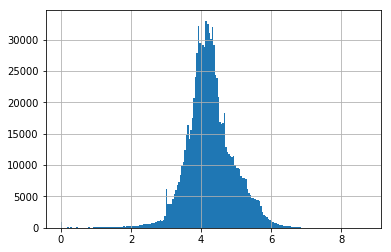

In [77]:
data['1_total_fee_call2_fee_log'].hist(bins=200)

In [ ]:
x

### 数据标准化

In [78]:
user_id=data.pop('user_id')
data_type=data.pop('data_type')
current_service=data.pop('current_service')
data_columns=data.columns

In [79]:
data

,1_total_fee_log,2_total_fee_log,3_total_fee_log,4_total_fee_log,age,complaint_level,contract_time,contract_type,former_complaint_fee_log,former_complaint_num,...,total_fee_min,total_caller_time_log,service2_caller_ratio,local_caller_ratio,total_month_traffic_log,month_traffic_ratio,last_month_traffic_ratio,1_total_fee_call_fee_log,1_total_fee_call2_fee_log,1_total_fee_trfc_fee
0,4.043051,4.123903,4.042174,4.050915,58.0,0,0.0,0,0.000000,0.0,...,55.95,3.982792,0.981366,0.981366,6.785189,0.499585,0.250996,4.043051,3.893859,56.638684
1,3.673766,3.914021,3.927896,3.867026,22.0,0,0.0,0,0.000000,0.0,...,38.40,3.646320,0.000000,0.443043,8.780351,0.000000,0.000000,3.520461,3.673766,38.400000
2,4.112512,4.036009,3.970292,4.139955,27.0,0,0.0,0,0.000000,0.0,...,52.00,4.158883,0.417969,0.977604,10.147876,0.000000,0.000000,4.019307,4.044585,60.100000
3,4.346399,3.795489,3.206803,3.669442,23.0,0,0.0,0,0.000000,0.0,...,23.70,5.660063,0.299362,0.156703,9.854413,0.005251,0.000000,3.853758,4.163637,46.200000
4,5.906859,6.102447,5.694069,5.998937,39.0,0,24.0,1,0.000000,0.0,...,296.10,7.233022,0.725356,0.003323,8.467295,0.922885,0.328057,5.738723,5.379540,-14.130067
5,5.118293,5.222785,5.204556,4.488636,59.0,0,24.0,1,0.000000,0.0,...,88.00,5.835688,0.997079,0.469520,5.471218,0.000000,0.000000,5.118293,4.752339,166.050000
6,2.830858,3.610918,2.833213,3.610918,27.0,0,12.0,3,0.000000,0.0,...,15.96,0.000000,0.000000,0.000000,3.350799,0.964944,17.528161,2.830858,2.830858,307.702342
7,4.937276,5.142131,4.505902,4.174387,35.0,0,26.0,12,0.000000,0.0,...,64.00,4.641824,0.990360,0.723490,10.275779,0.073074,0.000000,4.937276,4.820120,-497.820809
8,4.426044,4.495355,4.251348,4.279440,21.0,0,0.0,0,0.000000,0.0,...,69.20,2.843940,0.941804,0.000000,6.216606,0.998004,0.000000,4.426044,4.396577,-67.400000
9,4.160444,4.309456,3.951244,4.027136,27.0,0,0.0,0,0.000000,0.0,...,51.00,2.106165,0.000000,0.000000,0.000000,0.000000,0.000000,4.143412,4.160444,63.100000


In [80]:
# 对数据缩放
from sklearn.preprocessing import MinMaxScaler
# 构造输入特征的标准化器
MS = MinMaxScaler()
# 用训练训练模型（得到均值和标准差）：fit
Scaler_data = MS.fit_transform(data)

In [ ]:
data

In [81]:
data=pd.DataFrame(Scaler_data,columns=data_columns)

In [82]:
data=pd.concat([data,user_id,data_type,current_service],axis=1)

### Step6. 分割数据集

In [83]:
test_data = data[(data.data_type == 1)]
train_data = data[(data.data_type == 0)]

In [ ]:
train_data

In [ ]:
test_data

In [ ]:
train_data.to_csv(dpath +'train_data_xgboost.csv',index=False)
test_data.to_csv(dpath +'test_data_xgboost.csv',index=False)

In [34]:
train_data.to_csv(dpath +'train_data_uncat.csv',index=False)
test_data.to_csv(dpath +'test_data_uncat.csv',index=False)

In [ ]:
train_data.to_csv(dpath +'train_data.csv',index=False)
test_data.to_csv(dpath +'test_data.csv',index=False)